In [1]:
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [3]:
df_data = pd.read_csv(r'D:\BCG Data Science & Advanced Analytics Virtual Experience Program\ml_case_training_data.csv')

In [38]:
df_hist = pd.read_csv(r'D:\BCG Data Science & Advanced Analytics Virtual Experience Program\ml_case_training_hist_data.csv')
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [39]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
df_data.head(10)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,...,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000
6,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,NaN,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
7,1aa498825382410b098937d65c4ec26d,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2011-12-09,...,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200
8,7ab4bf4878d8f7661dfc20e9b8e18011,sscfoipxikopfskekuobeuxkxmwsuucb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,NaN,...,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
9,01495c955be7ec5e7f3203406785aae0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,...,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [6]:
df_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [7]:
df_target=pd.read_csv(r'D:\BCG Data Science & Advanced Analytics Virtual Experience Program\ml_case_training_output.csv')
df_target

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [8]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


# EXPLORATORY ANALYSIS

MISSING VALUES

In [9]:
#merge 2 dataset to perform exploratory analysis
df_data_churn = pd.merge(df_target , df_data,on=['id'])
df_data_churn

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [10]:
missing_data = df_data_churn.isnull()
missing_data.head()

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    16096
Name: id, dtype: int64

churn
False    16096
Name: churn, dtype: int64

activity_new
True     9545
False    6551
Name: activity_new, dtype: int64

campaign_disc_ele
True    16096
Name: campaign_disc_ele, dtype: int64

channel_sales
False    11878
True      4218
Name: channel_sales, dtype: int64

cons_12m
False    16096
Name: cons_12m, dtype: int64

cons_gas_12m
False    16096
Name: cons_gas_12m, dtype: int64

cons_last_month
False    16096
Name: cons_last_month, dtype: int64

date_activ
False    16096
Name: date_activ, dtype: int64

date_end
False    16094
True         2
Name: date_end, dtype: int64

date_first_activ
True     12588
False     3508
Name: date_first_activ, dtype: int64

date_modif_prod
False    15939
True       157
Name: date_modif_prod, dtype: int64

date_renewal
False    16056
True        40
Name: date_renewal, dtype: int64

forecast_base_bill_ele
True     12588
False     3508
Name: forecast_base_bill_ele, dtype: int64

forecast_base_bill_year
True    

In [12]:
#calculate missing data
def calculateAndPlotMissingData(data):
    total_data = len(data)
    total_miss = data.isnull().sum()
    percent_missing = total_miss*100/total_data
    missing_data_sum = pd.concat(
      (total_miss,percent_missing),
      axis = 1,
      keys =['Missing value','Percentage missing value']).sort_values('Percentage missing value',ascending = True)
    return missing_data_sum

In [13]:
Missing_value = calculateAndPlotMissingData(df_data_churn)
Missing_value

,Missing value,Percentage missing value
id,0,0.000000
churn,0,0.000000
num_years_antig,0,0.000000
nb_prod_act,0,0.000000
imp_cons,0,0.000000
cons_12m,0,0.000000
cons_gas_12m,0,0.000000
cons_last_month,0,0.000000
date_activ,0,0.000000
has_gas,0,0.000000


Text(0.5, 0, 'Percentage')

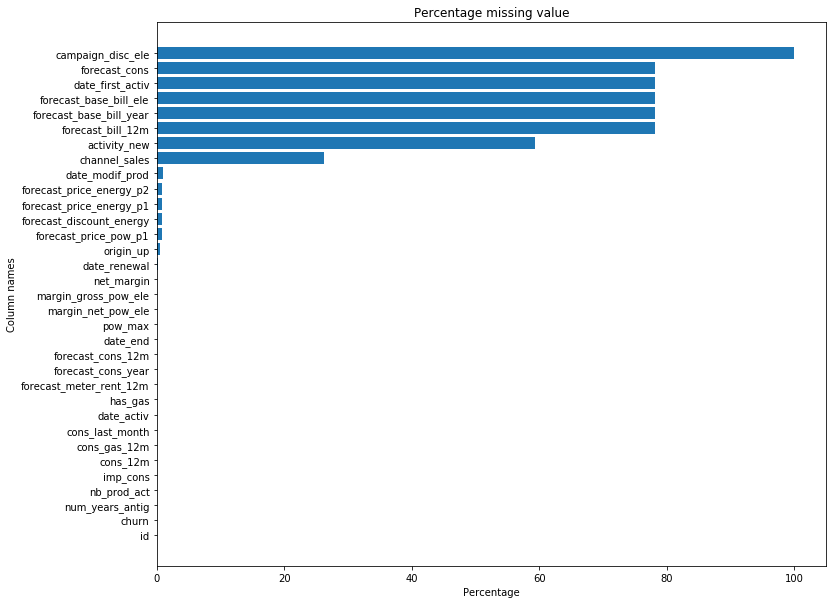

In [14]:
plt.figure(figsize = (12,10))
plt.barh(y = Missing_value.index,
          width = Missing_value['Percentage missing value'])
plt.title('Percentage missing value')
plt.ylabel('Column names')
plt.xlabel('Percentage')

It is noticed that "campaign_disc_ele" containing a 100% missing values thus will be drop from the model.
"forecast_bill_12m", "forecast_base_bill_year", "forecast_base_bill_ele", "date_first_activ", "forecast_cons" containing more than 80% empty records hence will also be dropped. 
Now it's time to replace the blank values with other alternative statistical elements in the remaining columns of the Missing_value


In [15]:
df_data_churn = df_data_churn.drop(df_data_churn[["campaign_disc_ele","forecast_bill_12m","forecast_base_bill_year","forecast_base_bill_ele","date_first_activ","forecast_cons"]], axis =1)

In [16]:
missing_variables=df_data_churn[["activity_new","channel_sales","date_modif_prod","forecast_price_energy_p2","forecast_price_energy_p1","forecast_discount_energy","forecast_price_pow_p1","origin_up","date_end", "pow_max","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]
missing_variables.describe()

,forecast_price_energy_p2,forecast_price_energy_p1,forecast_discount_energy,forecast_price_pow_p1,pow_max,margin_gross_pow_ele,margin_net_pow_ele,net_margin
count,15970.000000,15970.000000,15970.000000,15970.000000,16093.000000,16083.000000,16083.000000,16081.000000
mean,0.052951,0.135901,0.991547,43.533496,20.604131,22.462276,21.460318,217.987028
std,0.048617,0.026252,5.160969,5.212252,21.772421,23.700883,27.917349,366.742030
min,0.000000,0.000000,0.000000,-0.122184,1.000000,-525.540000,-615.660000,-4148.990000
25%,0.000000,0.115237,0.000000,40.606701,12.500000,11.960000,11.950000,51.970000
50%,0.086163,0.142881,0.000000,44.311378,13.856000,21.090000,20.970000,119.680000
75%,0.098837,0.146348,0.000000,44.311378,19.800000,29.640000,29.640000,275.810000
max,0.195975,0.273963,50.000000,59.444710,500.000000,374.640000,374.640000,24570.650000


In [17]:
missing_variables.activity_new.value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
xumuokeiidieboawuxkidxufcexecbbl       1
fcokoocmubsiclsbbefulmfiplksskbf       1
axicmuscucbmiecbxaiuudxiacufcpcx       1
oeacexidmflusdkwuuicmpiaklkxulxm       1
wceaopxmdpccxfmcdpopulcaubcxibuw       1
Name: activity_new, Length: 419, dtype: int64

In [18]:
missing_variables.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [19]:
missing_variables.date_modif_prod.value_counts()

2015-11-01    592
2015-05-24    275
2015-12-17    202
2015-12-16    181
2015-11-18    179
             ... 
2011-05-31      1
2009-02-01      1
2004-08-17      1
2004-06-18      1
2004-10-29      1
Name: date_modif_prod, Length: 2307, dtype: int64

In [20]:
missing_variables.forecast_price_energy_p2.value_counts()

0.000000    7227
0.098837     733
0.100123     598
0.100015     480
0.100572     452
            ... 
0.091994       1
0.086064       1
0.136080       1
0.084928       1
0.092126       1
Name: forecast_price_energy_p2, Length: 412, dtype: int64

In [21]:
missing_variables.forecast_price_energy_p1.value_counts()

0.145711    949
0.115174    737
0.144902    735
0.146694    647
0.115237    597
           ... 
0.106913      1
0.129985      1
0.110928      1
0.115201      1
0.108880      1
Name: forecast_price_energy_p1, Length: 617, dtype: int64

In [22]:
missing_variables.forecast_discount_energy.value_counts()

0.0     15391
30.0      280
24.0      112
28.0      102
22.0       58
25.0        7
26.0        5
19.0        4
17.0        3
50.0        2
23.0        2
10.0        2
12.0        1
5.0         1
Name: forecast_discount_energy, dtype: int64

In [23]:
missing_variables.forecast_price_pow_p1.value_counts()

 44.311378    7161
 40.606701    5170
 45.806878     705
 46.305378     618
 58.995952     592
 45.308378     422
 41.105201     307
 40.939027     237
 41.271364     164
 0.000000      100
 44.444710      90
 40.728885      85
 59.173468      84
 59.266378      54
 46.311378      31
 45.811378      31
 45.311378      27
 53.284378      17
 47.302378      10
 47.800878       9
 46.704178       7
 46.803878       6
 46.554622       5
 41.769863       5
 37.929294       4
 46.306878       3
 41.603701       2
 41.437526       2
 41.273368       2
 39.022007       2
 47.306878       2
 35.555768       2
 32.583108       1
 41.603697       1
 42.693430       1
 59.444710       1
 44.306878       1
 41.395552       1
-0.122184        1
 41.271868       1
 41.106701       1
 41.728885       1
 59.051284       1
 41.404305       1
 46.806878       1
 45.944710       1
Name: forecast_price_pow_p1, dtype: int64

In [24]:
missing_variables.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [25]:
missing_variables.margin_net_pow_ele.value_counts()

26.04    266
33.12    243
29.76    174
0.00     169
34.68    168
        ... 
54.93      1
62.76      1
11.97      1
34.11      1
75.48      1
Name: margin_net_pow_ele, Length: 3006, dtype: int64

In [26]:
missing_variables.mode()

,activity_new,channel_sales,date_modif_prod,forecast_price_energy_p2,forecast_price_energy_p1,forecast_discount_energy,forecast_price_pow_p1,origin_up,date_end,pow_max,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,2015-11-01,0.0,0.145711,0.0,44.311378,lxidpiddsbxsbosboudacockeimpuepw,2016-02-01,13.2,26.04,26.04,0.0


In [27]:
#replace missing values in the columns having type string
X = ["activity_new","origin_up","channel_sales","date_end","date_modif_prod","date_renewal"]
def replace_null (X):
    for i in X:
        new = df_data_churn[i].fillna(df_data_churn[i].mode()[0], inplace = True)
    return new
replace_null(X)

In [28]:
df_data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   churn                     16096 non-null  int64  
 2   activity_new              16096 non-null  object 
 3   channel_sales             16096 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16096 non-null  object 
 9   date_modif_prod           16096 non-null  object 
 10  date_renewal              16096 non-null  object 
 11  forecast_cons_12m         16096 non-null  float64
 12  forecast_cons_year        16096 non-null  int64  
 13  forecast_discount_energy  15970 non-null  float64
 14  foreca

In [29]:
RP_list_mode = ["activity_new","origin_up","channel_sales"]
df_data_churn[RP_list_mode].apply(lambda x: x.fillna(x.mode()[0], inplace = True), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
16091    None
16092    None
16093    None
16094    None
16095    None
Length: 16096, dtype: object

Because the modes of activity_new, channel_sales and forecast_discount_energy have much higher counts than the other values in the same columns, the empty cells will be replaced by modes values.The same is applied to origin_up (string).
For the other missing variables, the values are evenly distributed, hence the means would be adopted to replace empty values.

In [30]:
#replace mean to the missing values in columns having type float
Y=["forecast_price_energy_p2","forecast_price_energy_p1","forecast_discount_energy","forecast_price_pow_p1","margin_gross_pow_ele","margin_net_pow_ele","pow_max","net_margin"]
def replace_null (Y):
    for i in Y:
        new = df_data_churn[i].fillna(df_data_churn[i].mean(), inplace = True)
    return new
replace_null(Y)


In [31]:
df_data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   churn                     16096 non-null  int64  
 2   activity_new              16096 non-null  object 
 3   channel_sales             16096 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16096 non-null  object 
 9   date_modif_prod           16096 non-null  object 
 10  date_renewal              16096 non-null  object 
 11  forecast_cons_12m         16096 non-null  float64
 12  forecast_cons_year        16096 non-null  int64  
 13  forecast_discount_energy  16096 non-null  float64
 14  foreca

# Duplicate

In [32]:
df_data_churn.duplicated().sum()

0

This dataset has no duplicate value

# DATA TYPE CONVERSION

Most of the date columns are of type string, which have to be converted to datetime.

In [33]:
df_data_churn["date_active"]=pd.to_datetime(df_data_churn["date_activ"], format='%Y-%m-%d')

In [34]:
from datetime import datetime
def convert_to_date(df,cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col],format='%Y-%m-%d')
    return df


In [35]:
Datecolumns=["date_activ","date_end","date_modif_prod","date_renewal"]
convert_to_date(df_data_churn, Datecolumns)

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,date_active
0,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,2012-11-07
1,24011ae4ebbe3035111d65fa7c15bc57,1,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2013-06-15
2,d29c2c54acc38ff3c0614d0a653813dd,0,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2009-08-21
3,764c75f661154dac3a6c254cd082ea7d,0,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2010-04-16
4,bba03439a292a1e166f80264c16191cb,0,apdekpcbwosbxepsfxclislboipuxpop,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2010-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,2012-05-24
16092,d0a6f71671571ed83b2645d23af6de00,1,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,2012-08-27
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,2012-02-08
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,2012-08-30


In [36]:
df_data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   churn                     16096 non-null  int64         
 2   activity_new              16096 non-null  object        
 3   channel_sales             16096 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16096 non-null  datetime64[ns]
 9   date_modif_prod           16096 non-null  datetime64[ns]
 10  date_renewal              16096 non-null  datetime64[ns]
 11  forecast_cons_12m         16096 non-null  float64       
 12  forecast_cons_year

##OUTLIER REMOVAL

In [37]:
from collections import Counter
def detect_outliers (df,n, features):
    outlier_indices = []
    for col in features:
        #1st quartile (25%) => Q1
        Q1=np.percentile(df[col], 25)
        #2rd quartile (75%)=>Q3
        Q3 = np.percentile(df[col], 75)
        # Interquartile  - IQR:
        IQR = Q3-Q1
        # Outlier steps < Q1 -1.5 IQR, > Q3 +1.5 IQR
        outlier_step=1.5*IQR
        #Determine outlier:
        outlier_list_col = df[(df[col] <Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col)
        
    # select records containing more n outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers  = [k for k, v in outlier_indices.items() if v > n]
    
    return multiple_outliers

In [45]:
df_data_churn.columns

Index(['id', 'churn', 'activity_new', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'date_active'],
      dtype='object')

In [76]:
column_feature = ['cons_12m',
       'cons_gas_12m', 'cons_last_month','forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig','pow_max']

In [78]:
Outlier_to_drop = detect_outliers(df_data_churn, 2, column_feature)

"date_activ","date_end","date_modif_prod","date_renewal"

In [79]:
len(Outlier_to_drop) * 100/len(df_data_churn)

20.73807157057654

##VISUALIZATION


In [48]:
df_hist = pd.merge(df_hist, df_target, on=['id])

In [51]:
df_hist

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,0


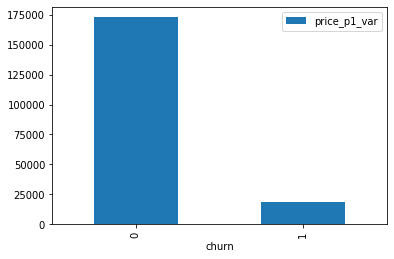

In [67]:
df_hist.pivot_table(values='price_p1_var', index = 'churn', aggfunc='count').plot.bar()

In [70]:
df_hist.groupby('churn').agg(Fix_1=('price_p1_fix','count'), Var_1=('price_p1_var','count'),
                             Fix_2=('price_p2_fix','count'), Var_2=('price_p2_var','count'),
                            Fix_3=('price_p3_fix','count'), Var_3=('price_p3_var','count')) 
#tips_df.groupby('sex').agg(mean_total_bill_tip=('total_bill_tip', 'mean'), mean_total_bill=('total_bill','mean'))

,Fix_1,Var_1,Fix_2,Var_2,Fix_3,Var_3
churn,,,,,,
0,172712,172712,172712,172712,172712,172712
1,18931,18931,18931,18931,18931,18931


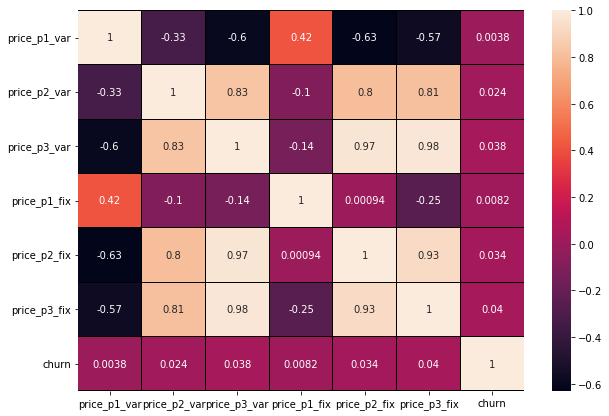

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(df_hist.corr(), annot = True, linewidths = 0.1, linecolor = 'black')
plt.show()

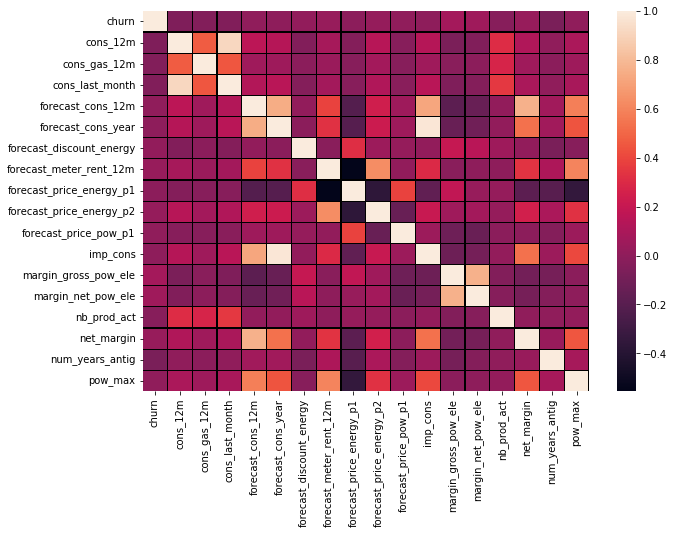

In [72]:
plt.figure(figsize = (10,7))
sns.heatmap(df_data_churn.corr(), annot = False, linewidths = 0.1, linecolor = 'black')
plt.show()

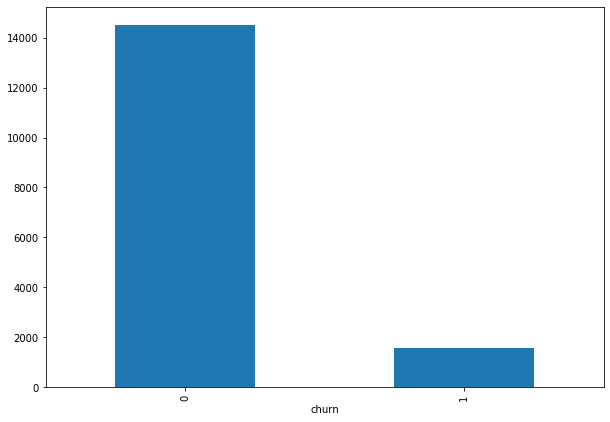

In [84]:
df_data_churn.groupby('churn')['channel_sales'].count().plot(kind = "bar", stacked = True, figsize = (10,7))
plt.show()